Data Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

---

Implementing Thompson Sampling

In [20]:
# no. of users/rounds, we have 10000 users but it works fine with just 500 too (we can start with 10000 and can go on reducing, we find that for 500 it works fine)
N = 500

# no. of ads
d = 10

# list of ads that are selected over the rounds, at the end it will have 500 elements, element at nth index shows the ad selected at round n
ads_selected = []

# no. of times an ad gets reward 1 upto round n
number_of_rewards_1 = [0] * d

# no. of times an ad gets reward 0 upto round n
number_of_rewards_0 = [0] * d

# total reward accumulated upto round n
total_reward = 0

for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if(random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n][ad]
    if(reward == 1):
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    total_reward += reward          

---

Visualizing the results

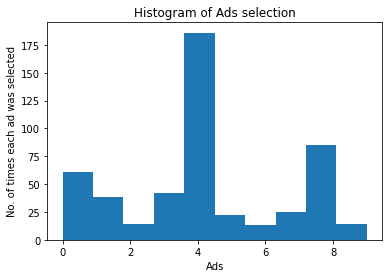

In [21]:
plt.hist(ads_selected)
plt.title('Histogram of Ads selection')
plt.xlabel('Ads')
plt.ylabel('No. of times each ad was selected')
plt.show()